In [25]:
import pandas as pd

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

df = pd.read_csv(r'..\\Data\\Primary_Land_Use_Tax_Lot_Output__PLUTO_.csv')
df.head(2)

,borough,block,lot,community board,census tract 2010,cb2010,schooldist,council district,postcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,latitude,longitude,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate,geom,dcpedited,notes
0,MN,1949,50,110.0,257.0,1005.0,5.0,9.0,10027.0,L040,28.0,8520.0,1.0,1A,547 MANHATTAN AVENUE,R7B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,A9,1.0,0.0,NaN,"DILDAY, ERIKA",1110.0,3360.0,0.0,2520.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,1.0,15.0,74.00,15.0,56.0,N,3.0,False,5.0,1.0,24900.0,171420.0,0.0,1899.0,0.0,0.0,NaN,NaN,3.03,3.00,0.0,3.0,1,1019490050,NaN,257.0,996992.0,234157.0,40.809373,-73.953971,6a,NaN,107N084,10706.0,NaN,NaN,NaN,1,20v8,10.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BK,6372,69,311.0,284.0,3000.0,20.0,47.0,11214.0,E243,62.0,8400.0,3.0,4E,40 BAY 22 STREET,R5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,C0,2.0,0.0,NaN,"LEUNG, HARRIS",1837.0,2821.0,0.0,2821.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,3.0,3.0,19.0,96.67,19.0,53.0,G,3.0,False,5.0,2.0,15960.0,72660.0,0.0,1965.0,0.0,0.0,NaN,NaN,1.54,1.25,0.0,2.0,3,3063720069,NaN,284.0,984030.0,159620.0,40.604796,-74.000792,22d,NaN,312 028,31906.0,NaN,NaN,NaN,1,20v8,11.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
import geopandas as gpd

nyc_zip = gpd.read_file('C:\\Users\\lilyx\\DataViz\\Data\\ZipCodes\\ZIP_CODE_040114.shp')
nyc_zip.head(2)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."


C:\Users\lilyx\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16,17,18,19,20,21,22,24,25,52,61,76,79,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


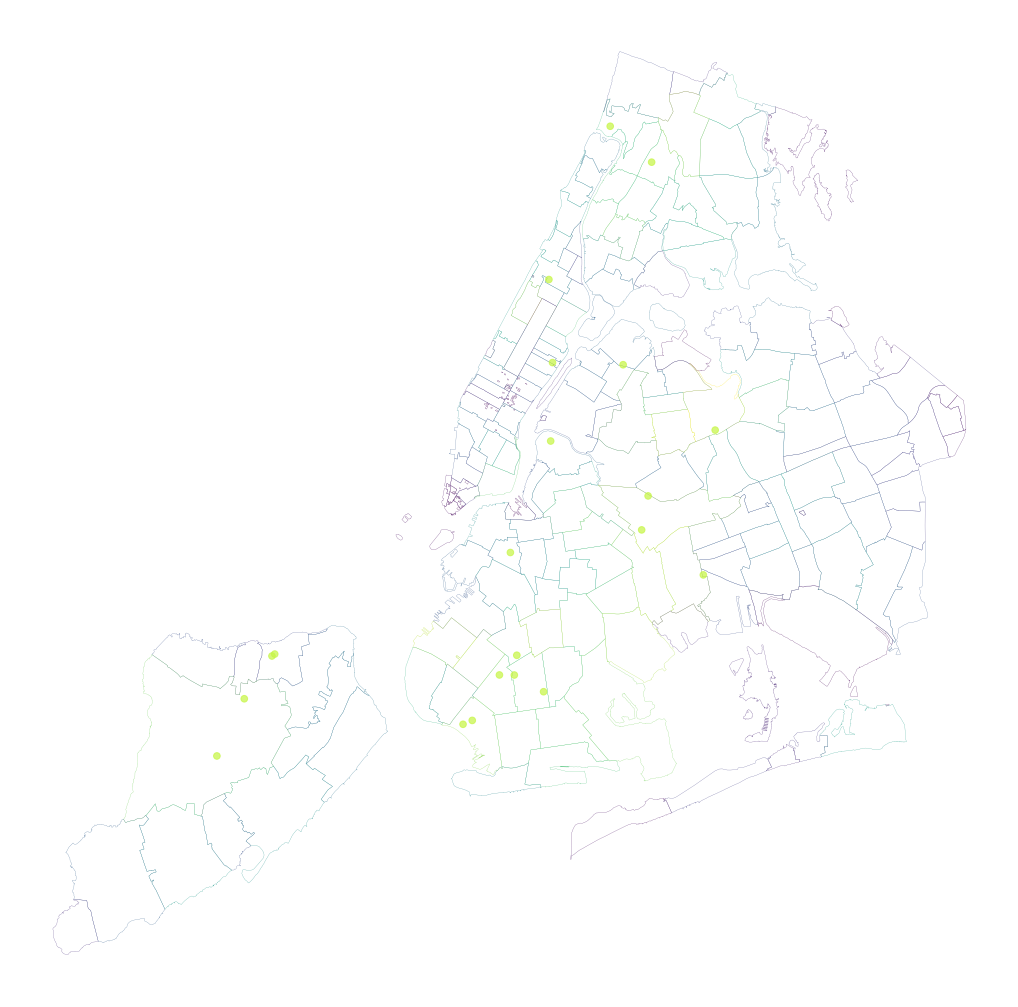

In [5]:
from shapely.geometry import Point
from matplotlib import pyplot
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd


# load data
nyc_zip = gpd.read_file('C:\\Users\\lilyx\\DataViz\\Data\\ZipCodes\\ZIP_CODE_040114.shp')
df = pd.read_csv(r'..\\Data\\Primary_Land_Use_Tax_Lot_Output__PLUTO_.csv')
df = df.head(100)

# convert dataframe to Point geometry
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df, crs = {'init' :'epsg:4326'}, geometry = geometry)

# set crs projection
nyc_zip.to_crs = {'init' :'epsg:4326'}
geo_df = geo_df.to_crs(nyc_zip.crs)

# plot visualization
fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
nyc_zip.plot(ax=ax, facecolor='none', column='POPULATION', edgecolor='#FFFFFF', linewidth=0.2)
geo_df.plot(ax=ax, markersize = geo_df['yearbuilt']** 0.5, color='#c5f542', alpha = 0.7)
ax.set_title("")
plt.savefig('ZipCodes.png',transparent=True);

C:\Users\lilyx\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16,17,18,19,20,21,22,24,25,52,61,76,79,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


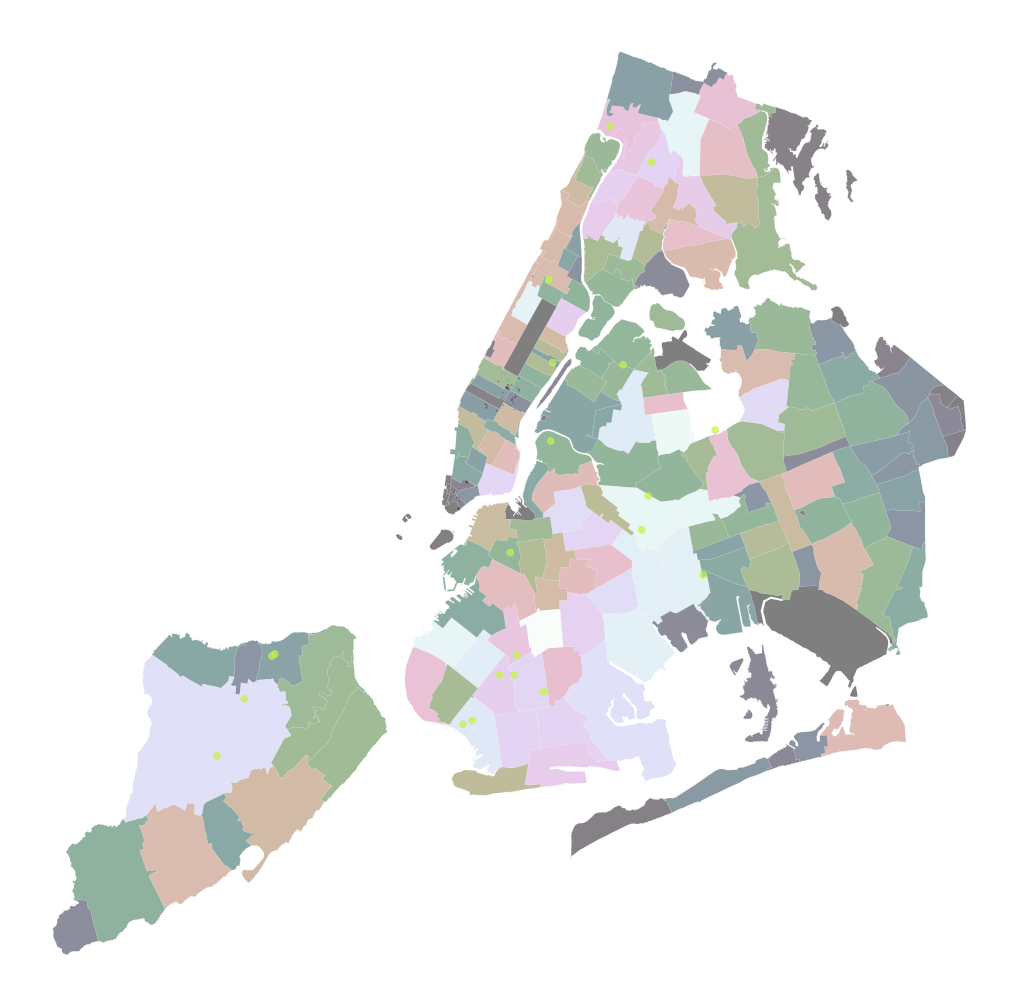

In [23]:
# load data
nyc_zip = gpd.read_file('C:\\Users\\lilyx\\DataViz\\Data\\ZipCodes\\ZIP_CODE_040114.shp')
df = pd.read_csv(r'..\\Data\\Primary_Land_Use_Tax_Lot_Output__PLUTO_.csv')
df = df.head(100)

# convert dataframe to Point geometry
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df, crs = {'init' :'epsg:4326'}, geometry = geometry)

# set crs projection
nyc_zip.to_crs = {'init' :'epsg:4326'}
geo_df = geo_df.to_crs(nyc_zip.crs)

# plot visualization
fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
nyc_zip.plot(ax=ax, column='POPULATION', edgecolor='#FFFFFF', linewidth=0.2, alpha = 0.5, cmap = 'cubehelix')
geo_df.plot(ax=ax, markersize = geo_df['yearbuilt']** 0.5, color='#c5f542', alpha = 0.7)
ax.set_title("")
plt.savefig('ZipCodes.png',transparent=True);

C:\Users\lilyx\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16,17,18,19,20,21,22,24,25,52,61,76,79,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


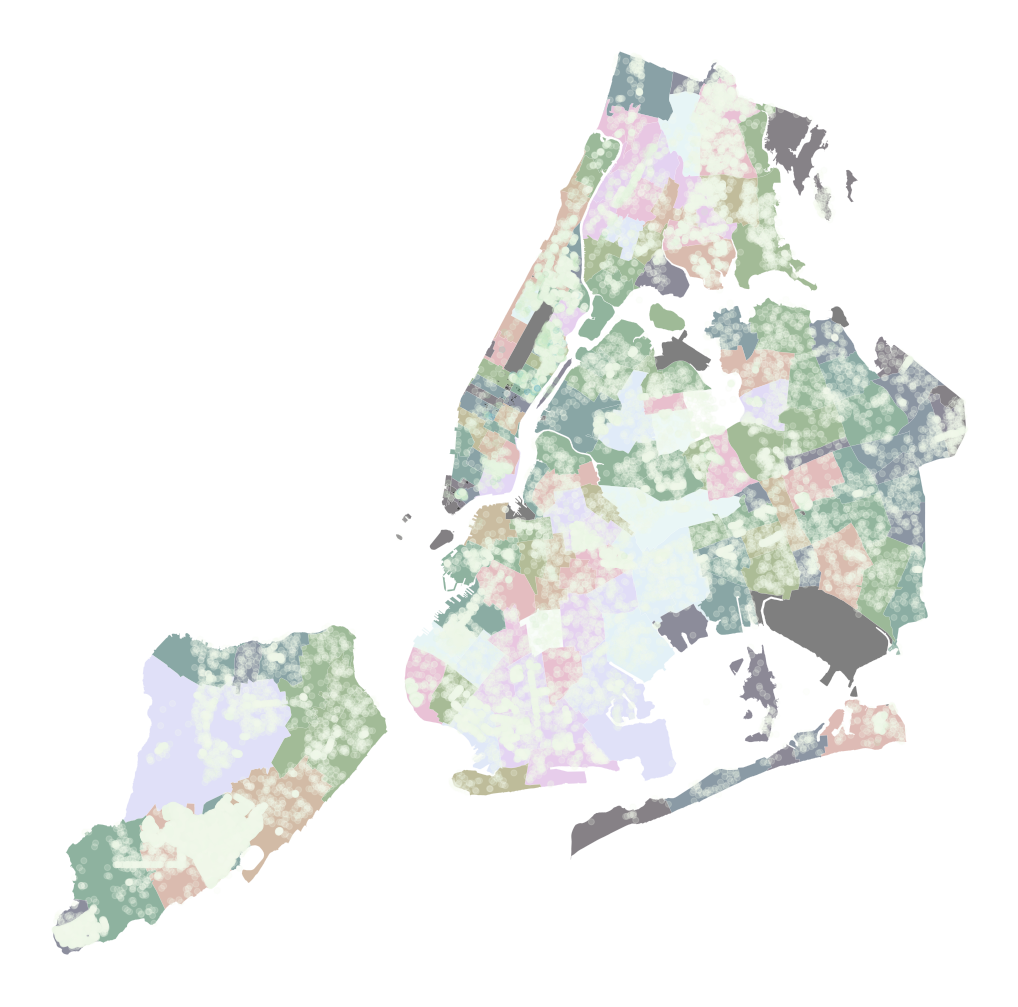

In [31]:
# load data
nyc_zip = gpd.read_file('C:\\Users\\lilyx\\DataViz\\Data\\ZipCodes\\ZIP_CODE_040114.shp')
df = pd.read_csv(r'..\\Data\\Primary_Land_Use_Tax_Lot_Output__PLUTO_.csv')
df = df.head(50000)

# convert dataframe to Point geometry
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df, crs = {'init' :'epsg:4326'}, geometry = geometry)

# set crs projection
nyc_zip.to_crs = {'init' :'epsg:4326'}
geo_df = geo_df.to_crs(nyc_zip.crs)

# plot visualization
fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
nyc_zip.plot(ax=ax, column='POPULATION', edgecolor='#FFFFFF', linewidth=0.2, alpha = 0.5, cmap = 'cubehelix')
geo_df.plot(ax=ax, column= 'numfloors', cmap= 'GnBu', alpha = 0.2, s = 0.3) # , markersize = geo_df['numfloors']
ax.set_title("")
plt.savefig('ZipCodes_Tax_2.png',transparent=True);

C:\Users\lilyx\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16,17,18,19,20,21,22,24,25,52,61,76,79,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


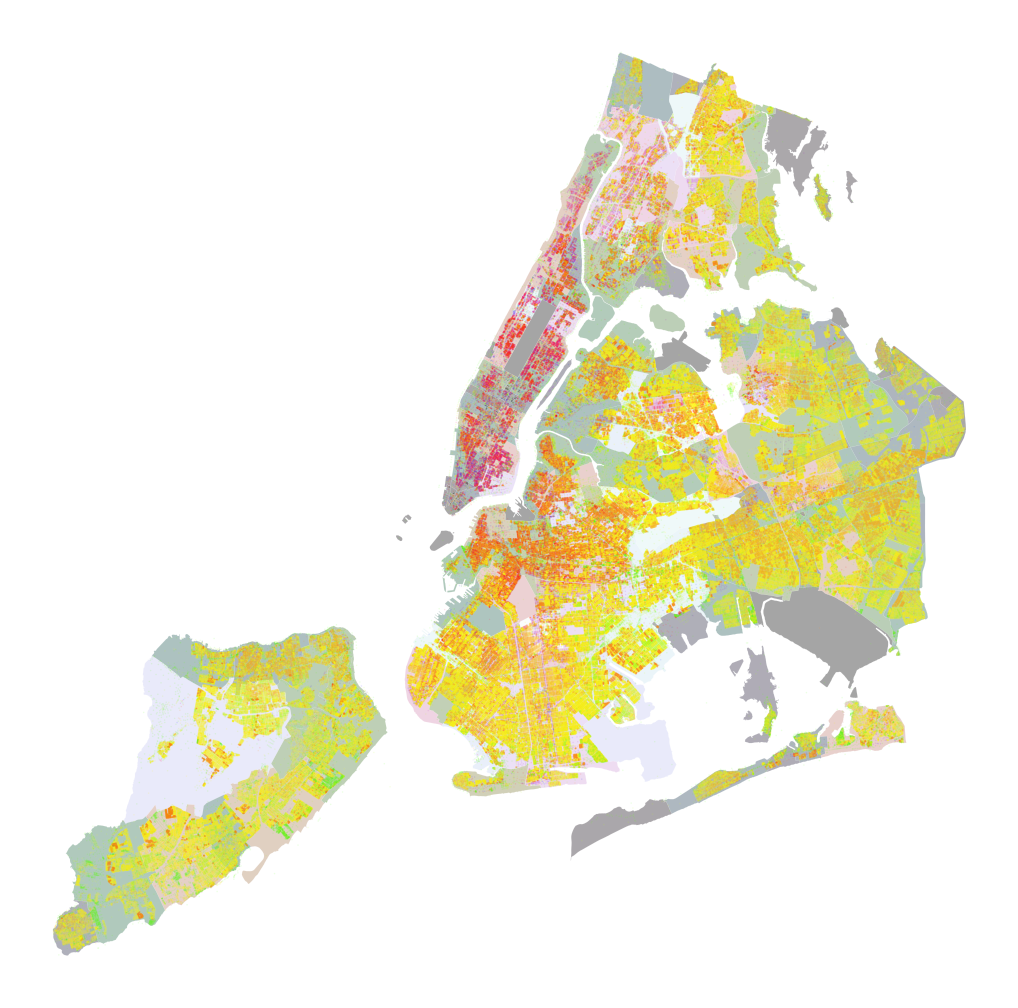

In [48]:
# load data
nyc_zip = gpd.read_file('C:\\Users\\lilyx\\DataViz\\Data\\ZipCodes\\ZIP_CODE_040114.shp')
df = pd.read_csv(r'..\\Data\\Primary_Land_Use_Tax_Lot_Output__PLUTO_.csv')
# df = df.head(50000)

# convert dataframe to Point geometry
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df, crs = {'init' :'epsg:4326'}, geometry = geometry)

# set crs projection
nyc_zip.to_crs = {'init' :'epsg:4326'}
geo_df = geo_df.to_crs(nyc_zip.crs)

# plot visualization
fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
nyc_zip.plot(ax=ax, column='POPULATION', edgecolor='#FFFFFF', linewidth=0.2, alpha = 0.35, cmap = 'cubehelix')
geo_df.plot(ax=ax, column= 'numfloors', cmap= 'prism_r', alpha = 0.1, s = 0.3) # , markersize = geo_df['numfloors']
ax.set_title("")
plt.savefig('ZipCodes.png',transparent=True);

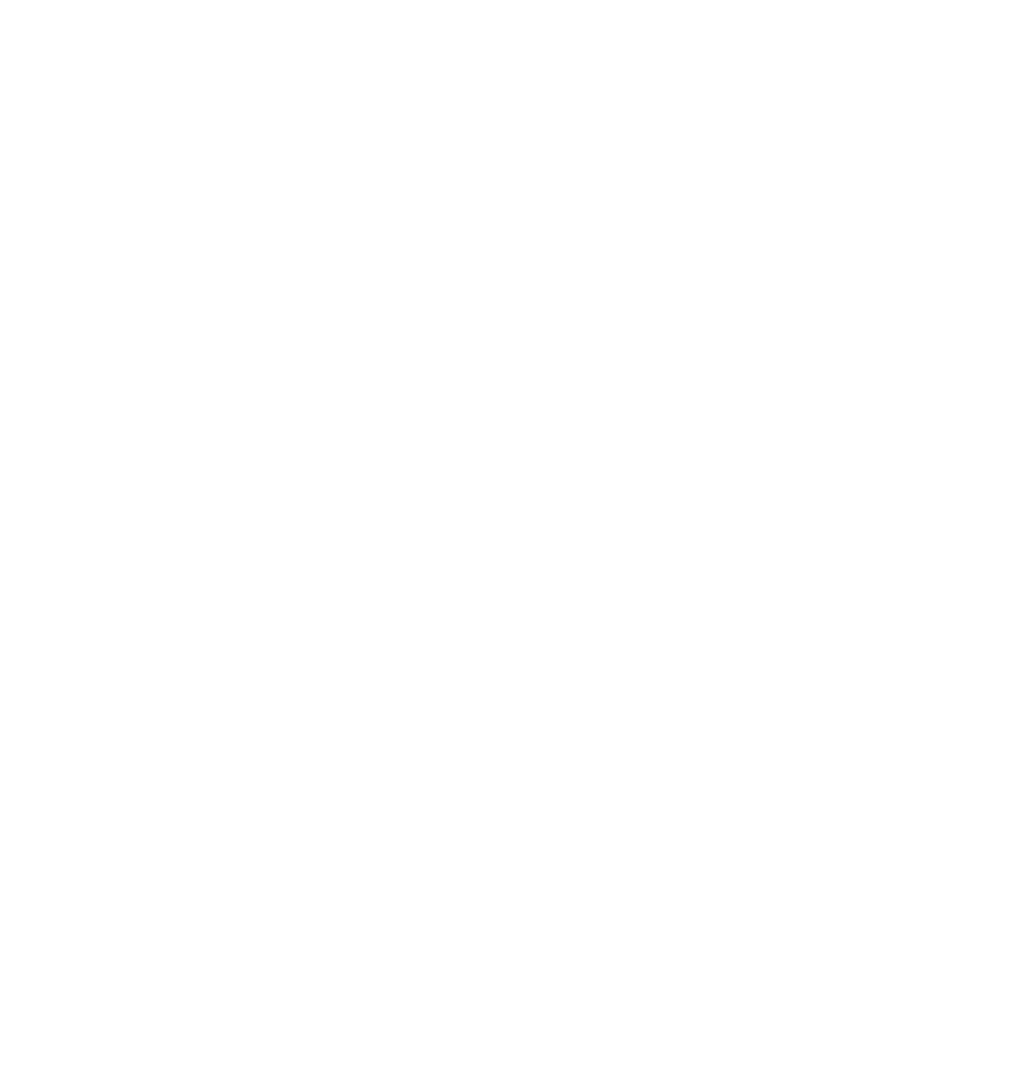

In [43]:
# load data
nyc_zip = gpd.read_file('C:\\Users\\lilyx\\DataViz\\Data\\ZipCodes\\ZIP_CODE_040114.shp')
df = pd.read_csv(r'..\\Data\\Primary_Land_Use_Tax_Lot_Output__PLUTO_.csv')
df = df.sample(100000)

# convert dataframe to Point geometry
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df, crs = {'init' :'epsg:4326'}, geometry = geometry)

# set crs projection
nyc_zip.to_crs = {'init' :'epsg:4326'}
geo_df = geo_df.to_crs(nyc_zip.crs)

# plot visualization
fig, ax = pyplot.subplots(figsize=(18, 24))
ax.axis('off')
nyc_zip.plot(ax=ax, column='POPULATION', edgecolor='#FFFFFF', linewidth=0.2, alpha = 0.35, cmap = 'cubehelix')
geo_df.plot(ax=ax, column= 'numfloors', cmap= 'prism', alpha = 0.2, s = 0.3) # , markersize = geo_df['numfloors']
ax.set_title("")
plt.xlim(-74.02,-73.925)
plt.ylim( 40.7,40.8)
plt.savefig('ZipCodes.png',transparent=True);

C:\Users\lilyx\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16,17,18,19,20,21,22,24,25,52,61,76,79,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


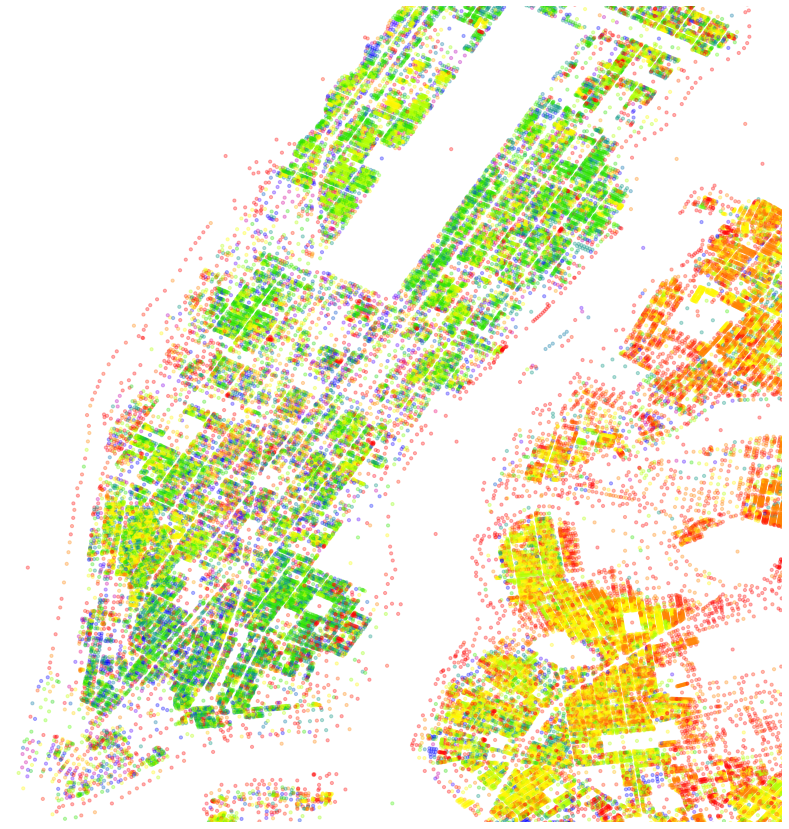

In [50]:
from shapely.geometry import Point, Polygon
# import libraries
import geopandas as gpd
import matplotlib.pyplot as plt

df = pd.read_csv('..\\Data\\Primary_Land_Use_Tax_Lot_Output__PLUTO_.csv')

# import street map
street_map = gpd.read_file('C:\\Users\\lilyx\\DataViz\\Data\\ZipCodes\\ZIP_CODE_040114.shp')


# designate coordinate system
crs = {'init':'espc:4326'}
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df,
 crs = crs,
 geometry = geometry)
       
       
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
ax.axis('off')
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4)

# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='numfloors',ax=ax,alpha=0.3, cmap= 'prism', legend=False,markersize=10)

# add title to graph
# plt.title(‘Rental Prices in NYC’, fontsize=15,fontweight=’bold’)
# set latitiude and longitude boundaries for map display
plt.xlim(-74.02,-73.925)
plt.ylim( 40.7,40.8)
# show map
plt.savefig('Building_Tax_Closeup.png',transparent=True)
plt.show()